# Linear Regression: Mini-Batch Gradient Descent - Two Parameters 

## Objective
>
Use PyTorch build-in functions to create a LR Mini-Batch Gradient Descent


## Table of Contents
>
    Create a model in PyTroch to help understand more complicated models and stage the approach for later use. </p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data </a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function the PyTorch way </a></li>
    <li><a href="#BGD">Train the Model: Batch Gradient Descent</a></li>
</ul>


<h2>Preparation</h2>


Need the following libraries:  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch. 


In [2]:
# class for plotting - adapted from pyplot support documentation

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Import libraries and set random seed.


In [3]:
# Import libraries and set random seed

import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:


In [4]:
# Create Data Class

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self,index):
        return self.x[index],self.y[index]

    # Get Length
    def __len__(self):
        return self.len

Create a dataset object: 


In [5]:
dataset = Data()

Plot out the data and the line.


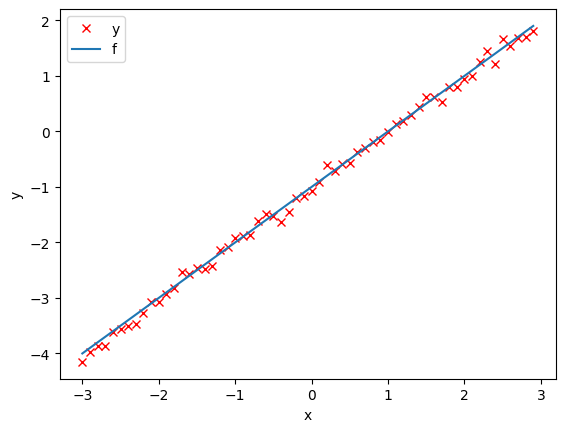

In [6]:
# Plot the data

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<!--Empty Space for separating topics-->


<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>


Create a linear regression class 


In [7]:
from torch import nn, optim

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Use PyTorch build-in functions to create a criterion function; this calculates the total loss or cost 


In [8]:
# Build in cost function

criterion = nn.MSELoss()

Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.


In [9]:
# Create optimizer

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3636]], requires_grad=True),
 Parameter containing:
 tensor([0.4957], requires_grad=True)]

'optimizer' - you have to give it an iterable containing the parameters i.e. provide 'model.parameters()' as an input to the object constructor 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4model_optmiz.png" width="100" alt="Model Optimizer">


Similar to the model, the optimizer has a state dictionary:


In [11]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

Many of the keys correspond to more advanced optimizers.


Create a <code>Dataloader</code> object: 


In [12]:
# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)

NOTE:  PyTorch randomly initializes model parameters. -> If we use those parameters, the result will not be very insightful as convergence will be extremely fast. So we will initialize the parameters such that they will take longer to converge so it can be visualized. 


In [13]:
# Customize the weight and bias

# Flag as a variable to test its volatility

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

Create a plotting object, not part of PyTroch, just used to help visualize 


In [14]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

<!--Empty Space for separating topics-->


## "BGD" = Train the Model via Batch Gradient Descent


Try 5-10 epochs of BGD: 
>
    bug data space is 1 iteration ahead of parameter space


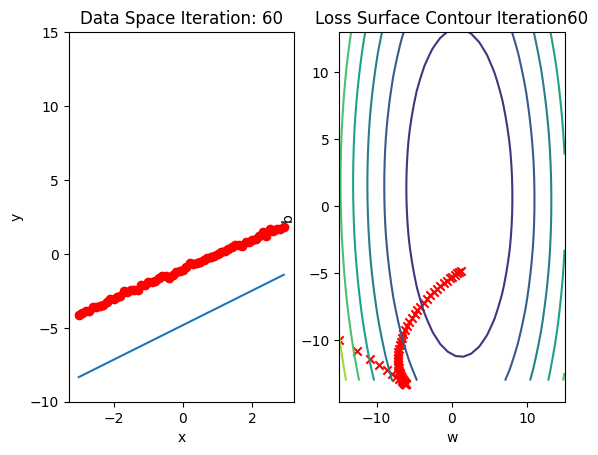

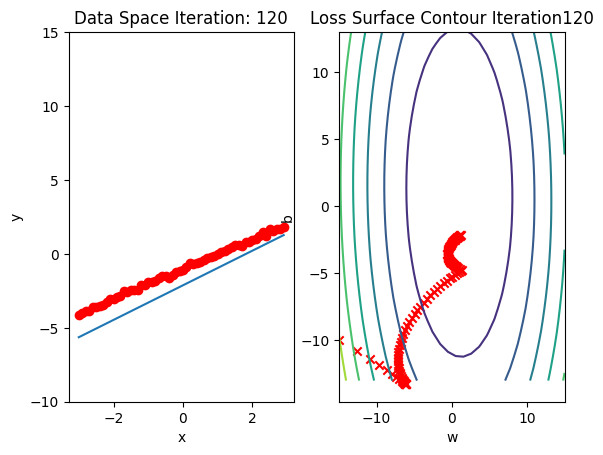

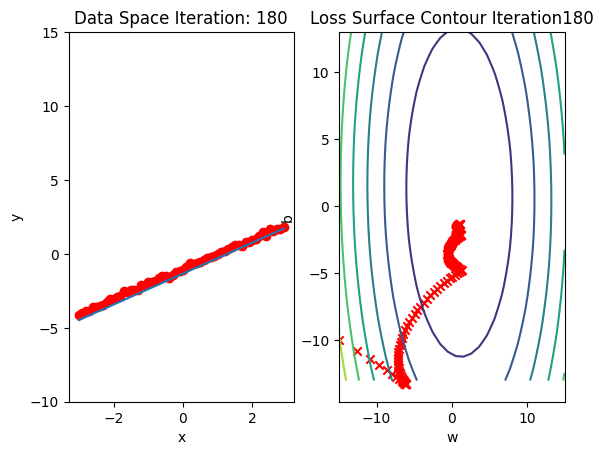

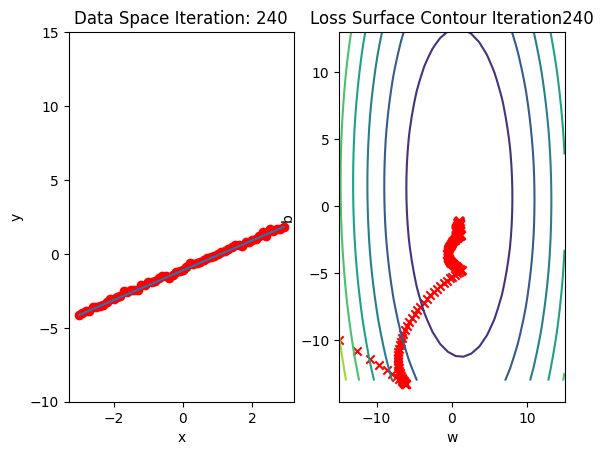

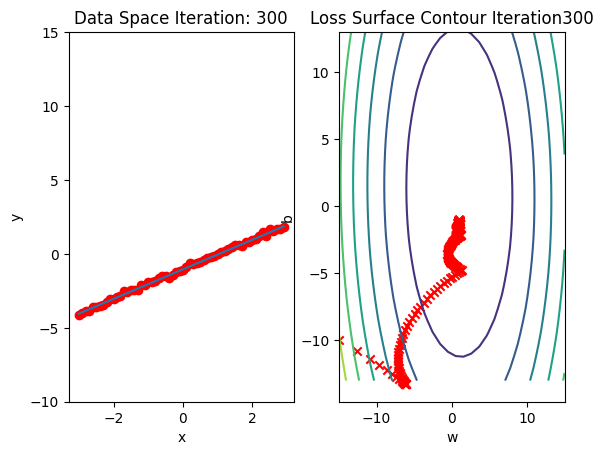

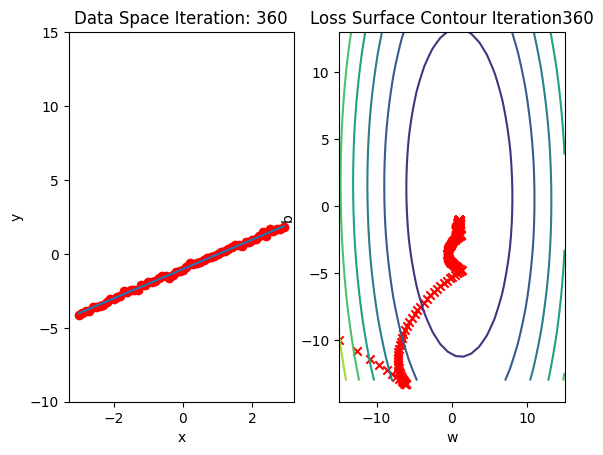

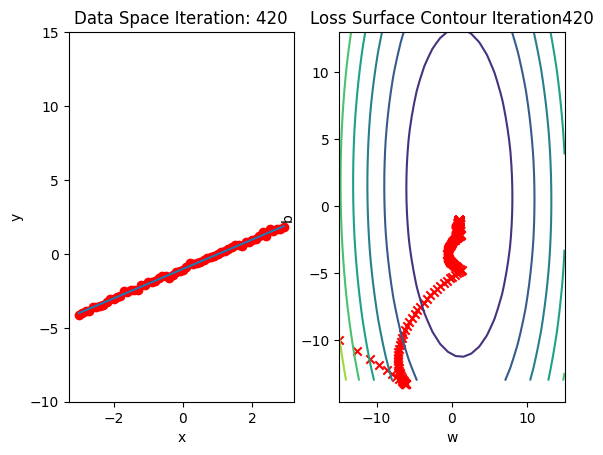

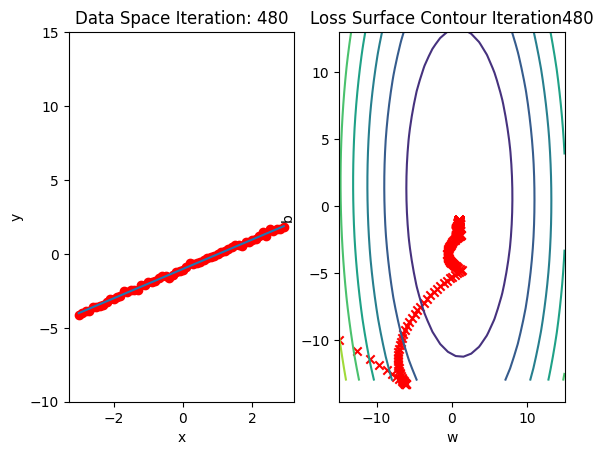

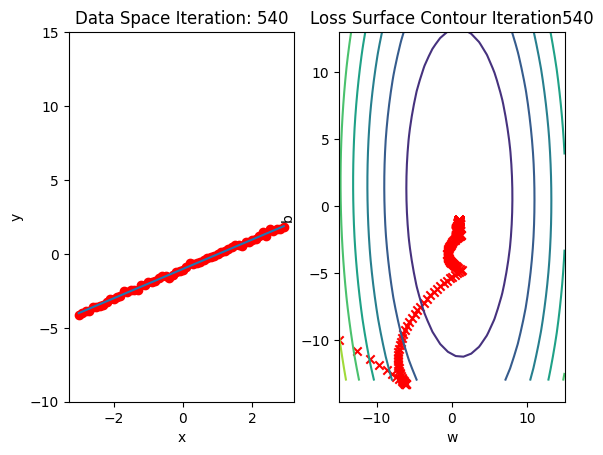

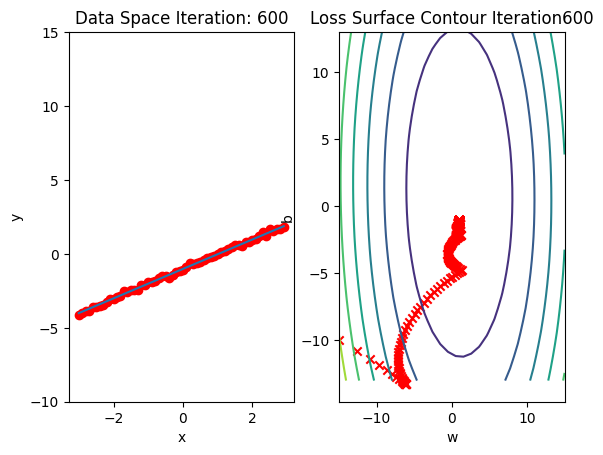

In [15]:
# Train BGD Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        get_surface.plot_ps()


train_model_BGD(10)

In [16]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9932]])),
             ('linear.bias', tensor([-1.0174]))])

Let's use the following diagram to help clarify the process. The model takes <code>x</code> to produce an estimate <code>yhat</code>, it will then be compared to the actual <code>y</code>  with the loss function.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4get_loss.png" width="400" alt="Old Model Cost diagram">


When we call <code>backward()</code> on the loss function, it will handle the differentiation. Calling the method step on the optimizer object it will update the parameters as they were inputs when we constructed the optimizer object. The connection is shown in the following figure :



<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4update_param.png" width="500" alt="Model Cost with optimizer">


<!--Empty Space for separating topics-->


### Beta Test


Train the model via BGD with lr = 0.1. Key function to use is 'optimizer'


Idea here is to flex the variables to see the changes. 

In [17]:
model = linear_regression(1,1)
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

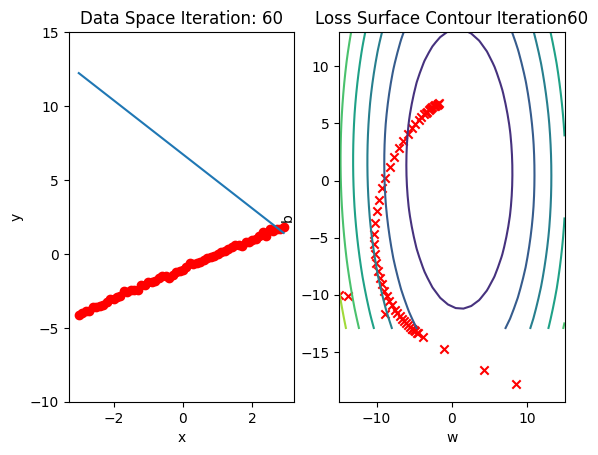

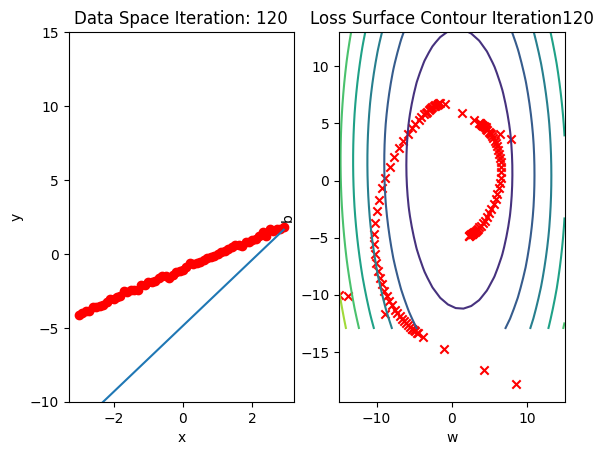

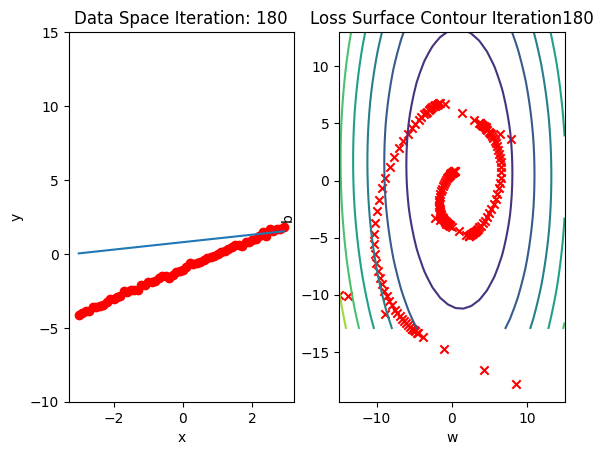

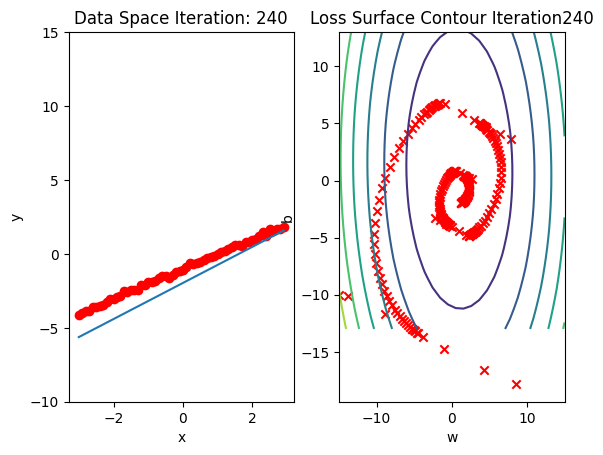

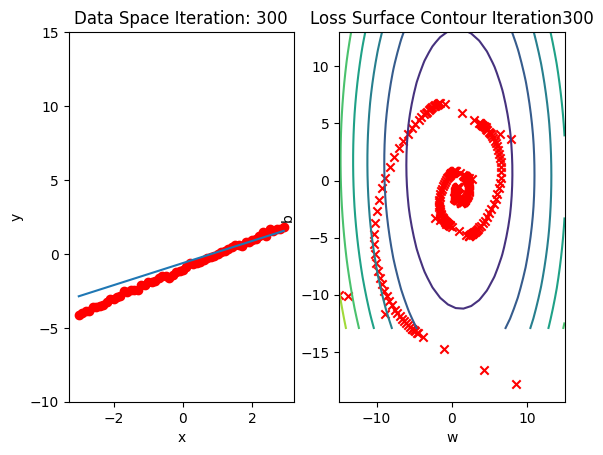

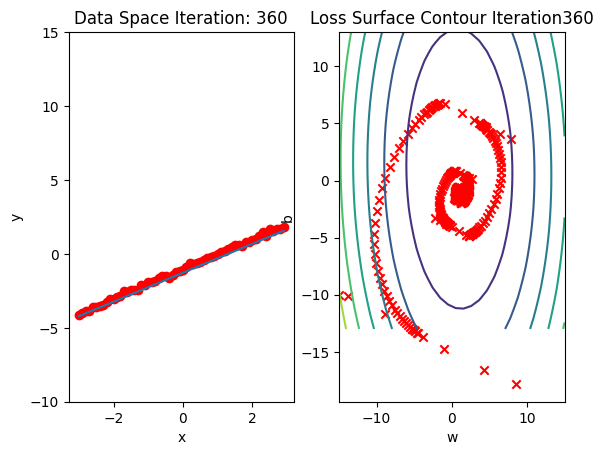

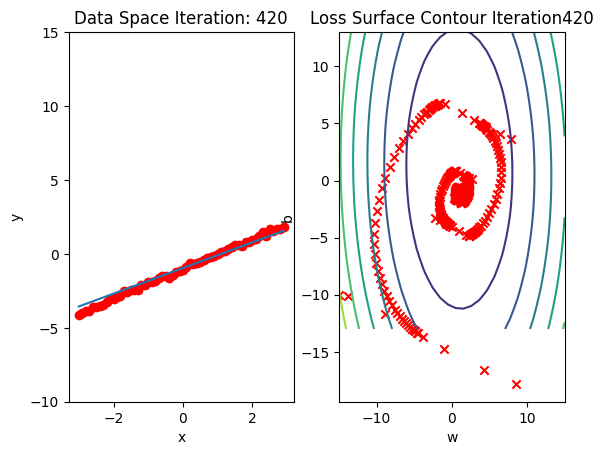

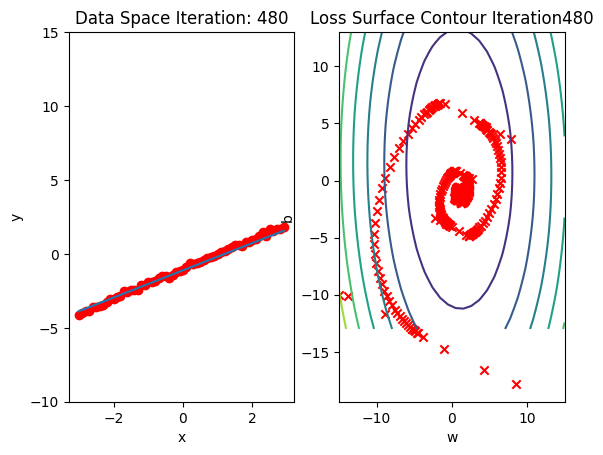

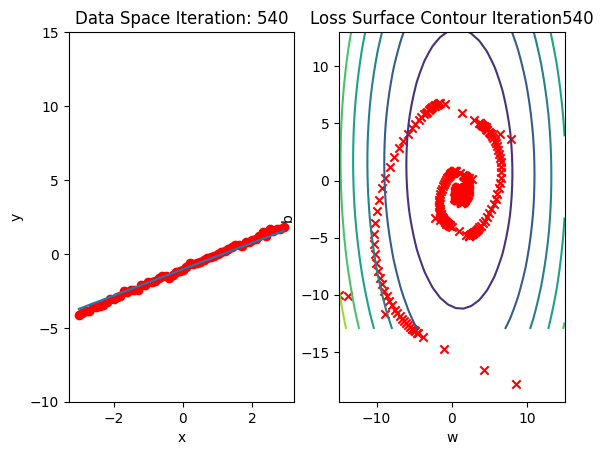

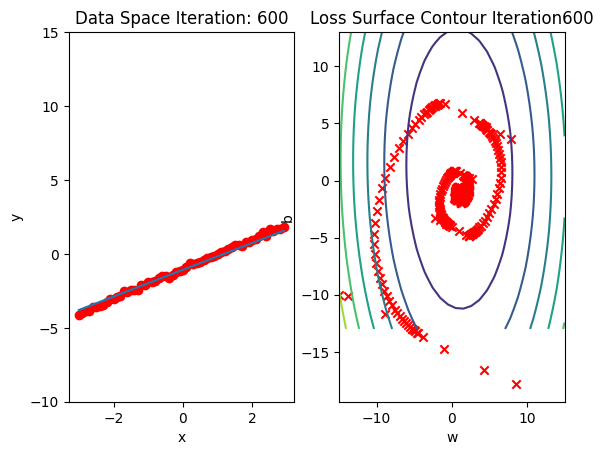

In [18]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)
trainloader = DataLoader(dataset = dataset, batch_size = 1)

def my_train_model(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        get_surface.plot_ps()

train_model_BGD(10)

# Conclusion


I think of BGD like teaching a robot to draw a line through a bunch of points, where the line should be as close as possible to all points. Here's what's really happening:

The Learning Process:
>
    The robot (our model) starts with a random guess at where to draw the line
    It looks at ALL the points at once (that's the "Batch" part)
    It measures how far off its line is from all the points (that's the "Loss")
    Then it adjusts the line a tiny bit to make it fit better
    Repeats this process until the line fits well enough


"Batch" Gradient Descent - means looking at all our data points at once

---
    **Author:** William Ruffu  
    **Date:** Jan 2025  
    **License:** All Rights Reserved | Open Source License | Freely distributable  
© 2024 William Ruffu